# Tutorial of lecture 2: Evolve a stellar population with SEVN

In [ ]:
!git clone https://gitlab.com/sevncodes/sevn

Cloning into 'sevn'...
remote: Enumerating objects: 14463, done.
remote: Counting objects: 100% (3251/3251), done.
remote: Compressing objects: 100% (1194/1194), done.
remote: Total 14463 (delta 2203), reused 3040 (delta 2054), pack-reused 11212 (from 1)
Receiving objects: 100% (14463/14463), 176.12 MiB | 14.86 MiB/s, done.
Resolving deltas: 100% (10162/10162), done.
Updating files: 100% (3949/3949), done.


In [ ]:
!pip install sevn/SEVNpy

Processing ./sevn/SEVNpy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for SEVNpy: filename=SEVNpy-0.3.1-cp310-cp310-linux_x86_64.whl size=11550146 sha256=96370d6bb0daad5f604b4a1ba67d25fed5f700318cc4fd81eb849cd1ead298d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-wknuvvz1/wheels/c5/4b/98/db4696d3b7d972c6cfc0312c1dea46352e5e03b307ccab18be
Successfully built SEVNpy


In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sevnpy.sevn import SEVNmanager,Star

Number of particles

In [ ]:
N=int(1e3)

In [ ]:
def salpeter(y,a,mini,maxi): #generate masses
    x=y*(maxi**(1.-a)-mini**(1.-a))+mini**(1.-a)
    x=x**(1./(1.-a))
    #print(x)
    return x

In [ ]:
def generate_ZAMS(N):
    #parameters for salpeter
    mini=5.
    maxi=150.
    asalp=2.3
    #parameters for salpeter

    np.random.seed(17)

    #initialize masses [Msun], positions [pc], velocities [km/s]
    m=np.zeros(N,float)


    y=np.random.rand(N)
    m=salpeter(y,asalp,mini,maxi) #mass of particles Msun


    return(m)


In [ ]:
def apply_evolve(star):
    star.evolve()
    return star

In [24]:
if __name__=="__main__":

    #Initialise the SEVN session, with default parameter
    SEVNmanager.init()

    #Number of stars
    Mzams=generate_ZAMS(N)
    Z=np.ones(len(Mzams))*1e-4
    Nstars = len(Mzams)
    Star_list =[Star(mzams,z) for mzams,z in zip(Mzams,Z)]
    #print(Star_list)


    #apply_evolve(Star_list[50])

    #evolve all populations, Serial run
    t1=time.time()
    Stars_evolved=list(map(apply_evolve,Star_list))

    t2=time.time()
    print(f"Runtime nproc=1: {t2-t1}",flush=True)



/usr/local/lib/python3.10/dist-packages/sevnpy/sevn/sevnmanager.py:287: RuntimeWarning: Calling initialise of an already initialised SEVN instance. We are finalising the object before reinitialising it
  sw.sevnio_initialise(SEVNmanager._sevnParams)


KeyboardInterrupt: 

In [ ]:
mrem=[]
for i in range(Nstars):
    mrem.append(str(Stars_evolved[i]["Mass"].iloc[-1,0])+","+str(int(Stars_evolved[i]["RemnantType"].iloc[-1,0])))

mrem

['1.0663326787861866,3',
 '1.3666721985281485,5',
 '1.0145459744193726,2',
 '0.9527271393122225,2',
 '1.2150879532833665,5',
 '1.1876376987456891,5',
 '1.3036091639752883,5',
 '1.3053725300295296,5',
 '0.9393827330377078,2',
 '1.1145086054021338,3',
 '40.01244474225836,6',
 '0.9497793204578366,2',
 '1.1821265341366645,5',
 '23.043539871038696,6',
 '0.946509156770671,2',
 '1.34806952784912,5',
 '1.4710269093947996,5',
 '1.2968623641780876,5',
 '1.3163171973102399,3',
 '1.0613691402633305,2',
 '1.0676574743594907,3',
 '1.2823387174564087,5',
 '1.2036636988435752,3',
 '1.4939090141565754,5',
 '1.2263660450211922,3',
 '0.9857570711783364,2',
 '0.9912103070511157,2',
 '0.9479980661421098,2',
 '1.2805895352348862,5',
 '1.0653233401437197,2',
 '1.0155070326567066,2',
 '1.2756974452732837,5',
 '1.3189012167149097,5',
 '0.9582602270590708,2',
 '1.3569571774396363,5',
 '0.997578439387798,2',
 '1.2477499930111458,5',
 '0.9729719365874395,2',
 '1.255294989503193,3',
 '6.635060303941364,6',
 '1.278

# Own code

Here I first included the code from part 1 of this weeks Tutorial to retrieve the stellar masses determined there. Then I do the exercises.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def salpeter_mass_function(N, min_mass, max_mass, a):
    rand_values = np.random.rand(N) # random values uniformly distributed between 0 and 1

    normalization_constant = (max_mass**(1 - a) - min_mass**(1 - a)) / (1 - a) # inverse of the normalization constant
                                                                                # needed for scaling of U

    masses = (rand_values * normalization_constant + min_mass**(1 - a)) ** (1 / (1 - a)) # stellar mass

    return masses

# Parameters
N = 10**5  # Number of stars
min_mass = 5.0  # Minimum stellar mass in Msun
max_mass = 150.0  # Maximum stellar mass in Msun
a = 2.35  # Salpeter mass function exponent

star_masses = salpeter_mass_function(N, min_mass, max_mass, a)
#np.savetxt('stellar_masses.txt', star_masses, header='Stellar Masses (M_sun)', comments='') # saves stellar masses as txt file

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(star_masses, bins=100, density=True, alpha=0.7, color='blue')
plt.title('Distribution of Stellar Masses (Salpeter Mass Function)')
plt.xlabel('Mass (M$_\odot$)')
plt.ylabel('Density')
plt.grid()
plt.show()

# Exercises:
Run these stars with the evolutionary code SEVN
with different metallicity
Z = 1e-4, 1e-3, 1e-2
- Plot the evolution of a few star mass with time (line plot)
- Plot histogram of compact object mass for different metallicities
comment what you find

## Line plot: Plot the evolution of a few star mass with time (line plot)

Evolution of mass with time for different metallicities Z = 1e-4, 1e-3, 1e-2.

### Single star


Runtime for Z=0.0001, star at index 50, nproc=1: 0.01014399528503418 seconds
Runtime for Z=0.001, star at index 50, nproc=1: 0.00790858268737793 seconds
Runtime for Z=0.01, star at index 50, nproc=1: 0.008386850357055664 seconds


/usr/local/lib/python3.10/dist-packages/sevnpy/sevn/sevnmanager.py:287: RuntimeWarning: Calling initialise of an already initialised SEVN instance. We are finalising the object before reinitialising it
  sw.sevnio_initialise(SEVNmanager._sevnParams)


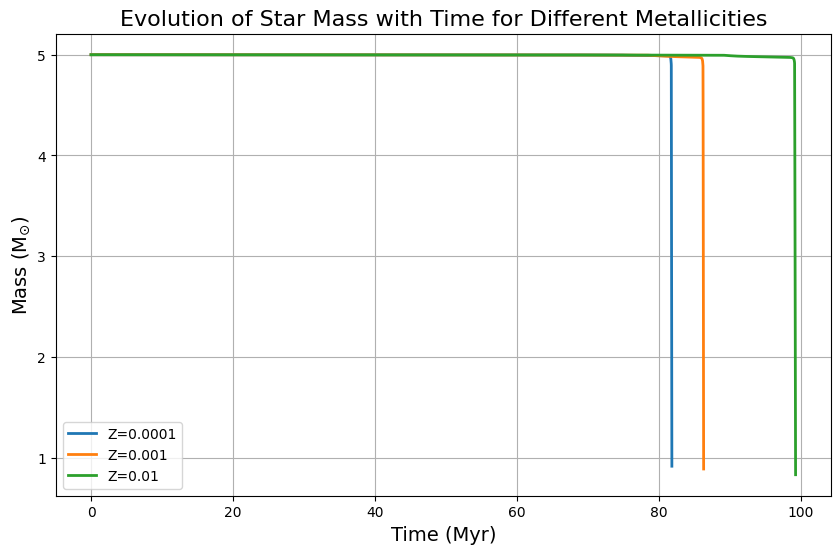

In [42]:
SEVNmanager.init()

# metallicities
metallicities = [1e-4, 1e-3, 1e-2]

# we chose one star
star_index = 50
mzams_star = star_masses[star_index]


plt.figure(figsize=(10, 6))

# Iterate over each metallicity and evolve the star
for Z in metallicities:
    star = Star(mzams_star, Z)

    t1 = time.time()
    evolved_star = apply_evolve(star)
    t2 = time.time()
    print(f"Runtime for Z={Z}, star at index {star_index}, nproc=1: {t2 - t1} seconds", flush=True)

    df = evolved_star.getp()
    time_series = df['Worldtime']  # Worldtime
    mass_series = df['Mass']  # Mass

    # Plot the mass evolution for this metallicity
    plt.plot(time_series, mass_series, label=f'Z={Z}', linewidth=2)


plt.xlabel('Time (Myr)', fontsize=14)
plt.ylabel('Mass (M$_{\odot}$)', fontsize=14)
plt.title('Evolution of Star Mass with Time for Different Metallicities', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


### Multiple stars

We chose the first 20 stars (collab is too slow :,) )

Runtime for Z=0.0001, star at index 0, nproc=1: 0.012950897216796875 seconds
Runtime for Z=0.0001, star at index 1, nproc=1: 0.014781713485717773 seconds
Runtime for Z=0.0001, star at index 2, nproc=1: 0.012073516845703125 seconds
Runtime for Z=0.0001, star at index 3, nproc=1: 0.011677265167236328 seconds
Runtime for Z=0.0001, star at index 4, nproc=1: 0.013120889663696289 seconds
Runtime for Z=0.0001, star at index 5, nproc=1: 0.01125025749206543 seconds
Runtime for Z=0.0001, star at index 6, nproc=1: 0.013836860656738281 seconds
Runtime for Z=0.0001, star at index 7, nproc=1: 0.010763168334960938 seconds


/usr/local/lib/python3.10/dist-packages/sevnpy/sevn/sevnmanager.py:287: RuntimeWarning: Calling initialise of an already initialised SEVN instance. We are finalising the object before reinitialising it
  sw.sevnio_initialise(SEVNmanager._sevnParams)


Runtime for Z=0.0001, star at index 8, nproc=1: 0.01661086082458496 seconds
Runtime for Z=0.0001, star at index 9, nproc=1: 0.013465166091918945 seconds
Runtime for Z=0.0001, star at index 10, nproc=1: 0.011101245880126953 seconds
Runtime for Z=0.0001, star at index 11, nproc=1: 0.011497020721435547 seconds
Runtime for Z=0.0001, star at index 12, nproc=1: 0.011903762817382812 seconds
Runtime for Z=0.0001, star at index 13, nproc=1: 0.012154579162597656 seconds
Runtime for Z=0.0001, star at index 14, nproc=1: 0.011913776397705078 seconds
Runtime for Z=0.0001, star at index 15, nproc=1: 0.011850833892822266 seconds
Runtime for Z=0.0001, star at index 16, nproc=1: 0.011432886123657227 seconds
Runtime for Z=0.0001, star at index 17, nproc=1: 0.01217961311340332 seconds
Runtime for Z=0.0001, star at index 18, nproc=1: 0.011838197708129883 seconds
Runtime for Z=0.0001, star at index 19, nproc=1: 0.011580705642700195 seconds
Runtime for Z=0.001, star at index 0, nproc=1: 0.010176897048950195 

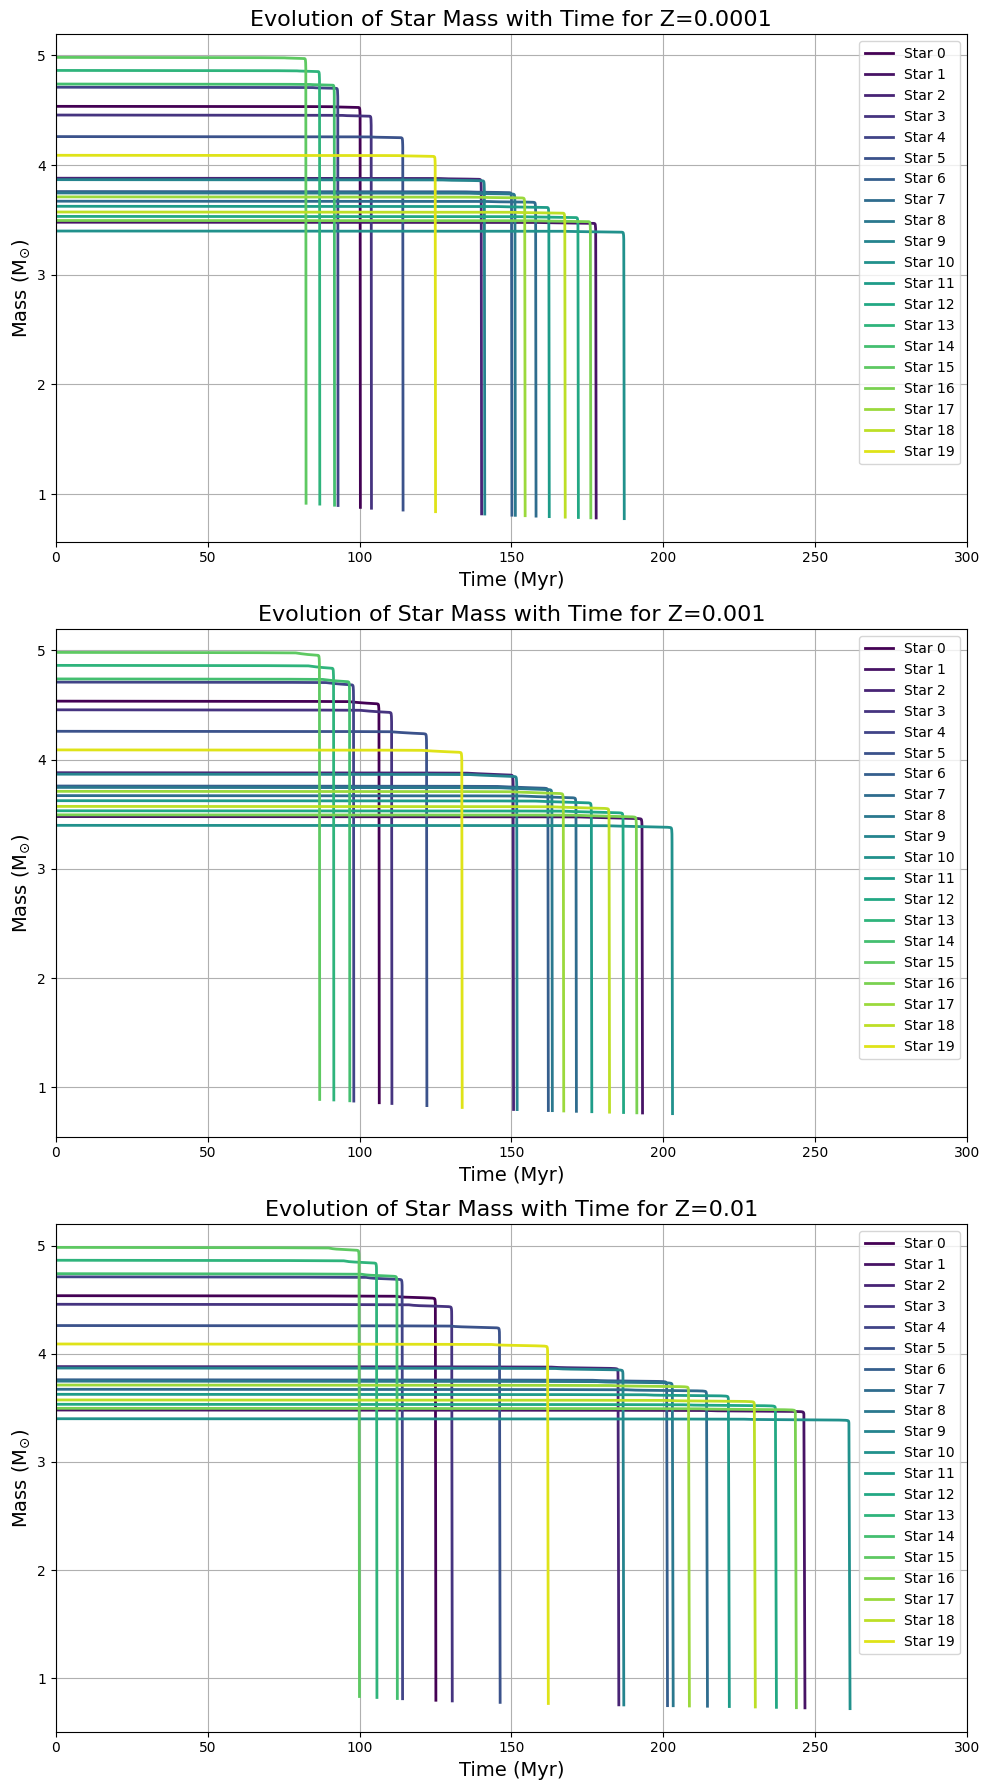

In [54]:
SEVNmanager.init()

metallicities = [1e-4, 1e-3, 1e-2]

num_stars = 20
star_indices = range(num_stars)

colormap = plt.cm.viridis
colors = [colormap(i / num_stars) for i in range(num_stars)]

fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows for 3 metallicities

# Iterate over each metallicity
for i, Z in enumerate(metallicities):
    ax = axs[i]  # Select the subplot for the current metallicity

    # Iterate over each star and evolve it
    for j, star_index in enumerate(star_indices):
        mzams_star = star_masses[star_index]

        star = Star(mzams_star, Z)

        t1 = time.time()
        evolved_star = apply_evolve(star)
        t2 = time.time()
        print(f"Runtime for Z={Z}, star at index {star_index}, nproc=1: {t2 - t1} seconds", flush=True)
        df = evolved_star.getp()

        time_series = df['Worldtime']  # Worldtime is the time column
        mass_series = df['Mass']  # Mass is the star's mass at each timestep
        ax.plot(time_series, mass_series, label=f'Star {star_index}', color=colors[j], linewidth=2)

    ax.set_xlabel('Time (Myr)', fontsize=14)
    ax.set_ylabel('Mass (M$_{\odot}$)', fontsize=14)
    ax.set_xlim([0, 300])
    ax.set_title(f'Evolution of Star Mass with Time for Z={Z}', fontsize=16)
    ax.grid(True)
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


We see that the more massive a star, the shorter uts time-evolution. Also with decreasing metallicity the time evolution becomes shorter as well.

## Histogram: Plot histogram of compact object mass for different metallicities

To get the compact object masses we select all stars with remnant type not 0 (in the user doc its listed that type 0 are non remnants, type 1-3 are white dwarfs, type 4-5 are SN and type 6 are BH)

We then plot the masses for these objects in histograms.

We do this for the first 15,000 stars.

In [71]:
df['RemnantType'].iloc[-1]

2.0

In [91]:

SEVNmanager.init()

metallicities = [1e-4, 1e-3, 1e-2]
num_stars = 15000
star_indices = range(num_stars)
compact_object_masses = {Z: [] for Z in metallicities}


# Loop through each metallicity
for Z in metallicities:
    print(f"Running evolution for metallicity Z = {Z}")

    # Evolve selected stars for the current metallicity
    for index in star_indices:
        mzams_star = star_masses[index]  # Initial mass of the star
        star = Star(mzams_star, Z)       # Initialize star with mass and metallicity

        # Evolve the star and record runtime
        t1 = time.time()
        evolved_star = apply_evolve(star)
        t2 = time.time()
        print(f"Star index {index} evolved for Z={Z} in {t2 - t1:.2f} seconds")

        star_df = evolved_star.getp()
        final_mass = star_df["Mass"].iloc[-1]          # Last mass value
        remnant_type = int(star_df["RemnantType"].iloc[-1])  # Last remnant type

        # Check if the final object is a compact object
        if remnant_type != 0:  # only index 0 is not a remnant
            compact_object_masses[Z].append(final_mass)



/usr/local/lib/python3.10/dist-packages/sevnpy/sevn/sevnmanager.py:287: RuntimeWarning: Calling initialise of an already initialised SEVN instance. We are finalising the object before reinitialising it
  sw.sevnio_initialise(SEVNmanager._sevnParams)


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Star index 10000 evolved for Z=0.01 in 0.01 seconds
Star index 10001 evolved for Z=0.01 in 0.01 seconds
Star index 10002 evolved for Z=0.01 in 0.01 seconds
Star index 10003 evolved for Z=0.01 in 0.01 seconds
Star index 10004 evolved for Z=0.01 in 0.01 seconds
Star index 10005 evolved for Z=0.01 in 0.01 seconds
Star index 10006 evolved for Z=0.01 in 0.01 seconds
Star index 10007 evolved for Z=0.01 in 0.01 seconds
Star index 10008 evolved for Z=0.01 in 0.01 seconds
Star index 10009 evolved for Z=0.01 in 0.01 seconds
Star index 10010 evolved for Z=0.01 in 0.01 seconds
Star index 10011 evolved for Z=0.01 in 0.01 seconds
Star index 10012 evolved for Z=0.01 in 0.01 seconds
Star index 10013 evolved for Z=0.01 in 0.01 seconds
Star index 10014 evolved for Z=0.01 in 0.01 seconds
Star index 10015 evolved for Z=0.01 in 0.01 seconds
Star index 10016 evolved for Z=0.01 in 0.01 seconds
Star index 10017 evolved for Z=0.01 in 0.01 secon

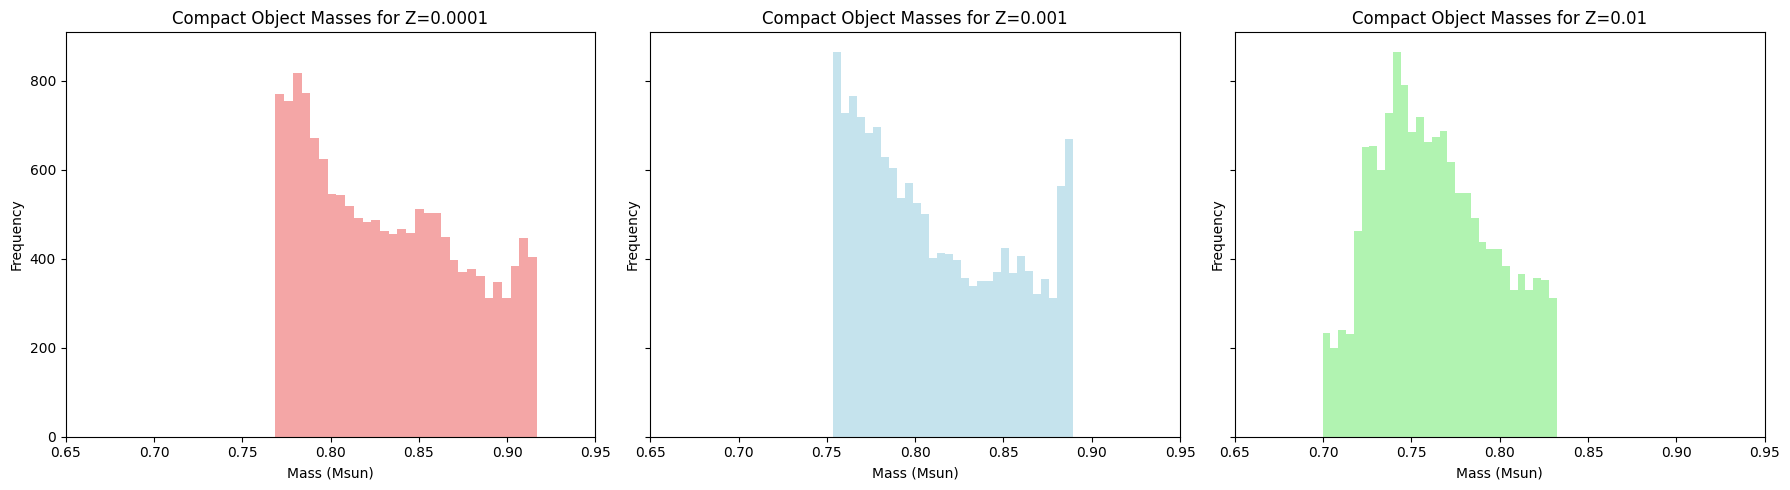

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
colors = ['lightcoral', 'lightblue', 'lightgreen']

for i, (Z, masses) in enumerate(compact_object_masses.items()):
    axs[i].hist(masses, bins=100, color=colors[i], alpha=0.7)
    axs[i].set_title(f"Compact Object Masses for Z={Z}")
    axs[i].set_xlabel("Mass (Msun)")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xlim(0.65, 0.95)

plt.tight_layout()
plt.show()

 ~1.4 M⊙ for neutron stars, or around 0.5-1.0 M⊙ for white dwarfs

general:

- Low Z=1e-4: shift toward higher Masses with peak at roughly 0.77 and then decrease.
- Intermediate Z=1e-3: shows lows and 'high' Masses
- High Z= 1e-2: shift toward low Masses, peaks around 0.74 then decreases


ALso I have to note that i chose the first 15,000 stars (not sure whether they are ordered somehow) so this could affect the histogram distribution. Because right now it looks like I only plot white dwarfs.

This is what we expect somewhat, because:

- Lower metallicity ( Z = 1e-4): Stars with low metallicity have weaker stellar winds because the metals drive less radiation pressure outward. With fewer metals to absorb radiation and propel particles away, these stars lose less mass over their lifetime. This results in a larger fraction of the star’s original mass being retained when it reaches the end of its life, leading to a more massive remnant.

- Intermediate metallicity (Z = 1e-3): At this metallicity, stars could have a more moderate evolution path compared to the very low or high metallicity cases. The resulting compact object masses might fall in between those formed from higher and lower metallicity stars.

- Higher metallicity (Z = 1e-2): Stars with higher metallicity experience stronger stellar winds because metals increase opacity and drive more intense radiation pressure. As a result, high-metallicity stars lose more mass over time, reducing the amount of mass available to collapse into a remnant. This means that the remnants of high-metallicity stars are generally less massive than those of low-metallicity stars.

In [93]:
SEVNmanager.close()